In [56]:
!pip install -U "jpype1<1.1"

In [57]:
!pip install konlpy
!pip install wordcloud

In [58]:
## 기본
import numpy as np  # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import matplotlib as mp

# %matplotlib inline
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import seaborn as sns
# import re

# mp.rcParams['axes.unicode_minus'] = False


## 데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [59]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

In [60]:
fm = mp.font_manager.FontManager()
plt.rcParams["font.family"] = 'Malgun Gothic'

terminado                          0.9.4
testpath                           0.4.4
textdistance                       4.2.1
threadpoolctl                      2.1.0
three-merge                        0.1.1
tifffile                           2021.4.8
toml                               0.10.2
toolz                              0.11.1
tornado                            6.1
tqdm                               4.59.0
traitlets                          5.0.5
tweepy                             3.10.0
typed-ast                          1.4.2
typing-extensions                  3.7.4.3
ujson                              4.0.2
unicodecsv                         0.14.1
urllib3                            1.26.4
watchdog                           1.0.2
wcwidth                            0.2.5
webencodings                       0.5.1
Werkzeug                           1.0.1
wheel                              0.36.2
widgetsnbextension                 3.5.1
win-inet-pton                      1.1.0
win-un

In [61]:
pd.set_option('display.max_columns',100)

In [70]:
df = pd.read_csv('E:/VSC/Criminal_data/NewsResult_20110715-20210716.csv',sep=',',  thousands = ',')
df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100201e+06,20210709,국민일보,권남영,“어른 잘못도” 서당 폭행 선고에 언급된 ‘나의 아저씨’,사회>사건_사고,문화>방송_연예,문화>출판,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,정성호,아이유","창원지법,하동,경남","소년,검찰,tvN,B군,A군","어른,서당,폭행,선고,언급,아저씨,서당,경남,하동,엽기,폭행,선고,재판장,이례적,유...","창원지법,아이유,가해자,이선균,소년범,판결문,재판장,부장판사,소년부,가해자들,등장인...",경남 하동 서당에서 벌어진 ‘엽기 폭행’ 선고에서 재판장이 이례적으로 유명 드라마를...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN
1,1.100801e+06,20210708,조선일보,김준호 기자,“이선균 같은 어른은 적다” 서당 폭행 재판서 언급된 ‘나저씨’,사회>사건_사고,문화>출판,사회>여성,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,정,정성호,아이유","창원지법,청학동","창원지방법원,소년,형사1부,소년부,검찰,가정법원,진주지원,재판부,C군,tvN,여주인...","이선균,어른,서당,폭행,재판서,언급,나저씨,분위기,재판장,판사,드라마,아저씨,이야기...","소년부,피해자,소년범,재판부,아이유,가해자,재판장,소년법,이선균,진주지원,창원지방법...",엄숙한 분위기의 재판장에서 판사가 돌연 드라마 ‘나의 아저씨’ 이야기를 꺼냈다. “...,https://www.chosun.com/national/regional/yeong...,NaN
2,1.100611e+06,20210708,서울신문,이보희,“이선균 같은 어른 많지 않아” 서당 폭행 선고서 ‘나의 아저씨’ 언급,사회>사건_사고,문화>출판,문화>방송_연예,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,이지은,정성호,아이유","창원지법,청학동,하동,경남","소년,형사1부,소년부,검찰,가정법원,tvN,C군,A군","이선균,어른,선고서,서당,폭행,아저씨,언급,정성호,부장,판사,교화,기회,형사처벌,소...","소년부,아이유,이선균,창원지법,가해자,부장판사,정성호,소년범,형사처벌,하동,등장인물...","경남 하동 서당에서 벌어진 ‘엽기 폭행’ 선고에서 재판장이 이지은(아이유), 이선균...",http://www.seoul.co.kr/news/newsView.php?id=20...,NaN
3,2.100801e+06,20210708,아시아경제,최석진,"법원, 청학동 서당 '엽기 폭행' 10대 2명 법정구속",사회>사건_사고,사회>여성,사회>교육_시험,범죄>범죄일반>폭행,NaN,NaN,"장은,정성호","창원지법,청학동,하동군","창원지방법원,소년부,검찰,형사1부(부장판사,진주지원,재판부,법원,검찰청,B군,A군","법원,청학동,서당,엽기,폭행,법정구속,법정,구속,청학동,서당,또래,학생,엽기,폭행,...","피해자,청학동,법정구속,a군,부정기형,재판부,10대,공소사실,진주지원,검찰청,소년법...",[아시아경제 최석진 법조전문기자] 청학동 서당에서 또래 학생에게 엽기 폭행을 저지른...,https://www.asiae.co.kr/article/20210708171656...,NaN
4,1.100701e+06,20210704,세계일보,강소영,"“동거한 애인 보고 싶어 음악방송 때 움직였다” 신창원, 907일의 도주 뒷 이야기",문화>방송_연예,사회>사건_사고,문화>학술_문화재,범죄>범죄일반>절도,NaN,NaN,신창원,"서울,강동구,농원,천안,천호동,순천,전남","부산교도소,뉴시스,환기구 쇠창살","동거,애인,음악방송,신창원,907일,도주,이야기,도주,희대,탈옥수,신창원,뉴시스,희...","신창원,교도소,부산교도소,환기구,천호동,화장실,서울,강동구,음악방송,동거녀,순천,주...",희대의 탈옥수로 불리던 신창원. 뉴시스 \n 희대의 탈옥수 신창원(사진)의 탈옥에 ...,http://www.segye.com/content/html/2021/07/04/2...,NaN


In [71]:
df.shape

(2083, 19)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             2083 non-null   float64
 1   일자                 2083 non-null   int64  
 2   언론사                2083 non-null   object 
 3   기고자                1720 non-null   object 
 4   제목                 2083 non-null   object 
 5   통합 분류1             2083 non-null   object 
 6   통합 분류2             1775 non-null   object 
 7   통합 분류3             1255 non-null   object 
 8   사건/사고 분류1          2083 non-null   object 
 9   사건/사고 분류2          1547 non-null   object 
 10  사건/사고 분류3          855 non-null    object 
 11  인물                 1627 non-null   object 
 12  위치                 1799 non-null   object 
 13  기관                 2070 non-null   object 
 14  키워드                2083 non-null   object 
 15  특성추출(가중치순 상위 50개)  2083 non-null   object 
 16  본문                 2083 

In [73]:
from konlpy.tag import Okt
twitter = Okt()

In [74]:
word_list = []
word_list = df.iloc[0:,2:17]

In [75]:
word_list.head()

,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문
0,국민일보,권남영,“어른 잘못도” 서당 폭행 선고에 언급된 ‘나의 아저씨’,사회>사건_사고,문화>방송_연예,문화>출판,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,정성호,아이유","창원지법,하동,경남","소년,검찰,tvN,B군,A군","어른,서당,폭행,선고,언급,아저씨,서당,경남,하동,엽기,폭행,선고,재판장,이례적,유...","창원지법,아이유,가해자,이선균,소년범,판결문,재판장,부장판사,소년부,가해자들,등장인...",경남 하동 서당에서 벌어진 ‘엽기 폭행’ 선고에서 재판장이 이례적으로 유명 드라마를...
1,조선일보,김준호 기자,“이선균 같은 어른은 적다” 서당 폭행 재판서 언급된 ‘나저씨’,사회>사건_사고,문화>출판,사회>여성,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,정,정성호,아이유","창원지법,청학동","창원지방법원,소년,형사1부,소년부,검찰,가정법원,진주지원,재판부,C군,tvN,여주인...","이선균,어른,서당,폭행,재판서,언급,나저씨,분위기,재판장,판사,드라마,아저씨,이야기...","소년부,피해자,소년범,재판부,아이유,가해자,재판장,소년법,이선균,진주지원,창원지방법...",엄숙한 분위기의 재판장에서 판사가 돌연 드라마 ‘나의 아저씨’ 이야기를 꺼냈다. “...
2,서울신문,이보희,“이선균 같은 어른 많지 않아” 서당 폭행 선고서 ‘나의 아저씨’ 언급,사회>사건_사고,문화>출판,문화>방송_연예,범죄>범죄일반>폭행,사회>사회문제>미성년범죄,NaN,"이선균,이지은,정성호,아이유","창원지법,청학동,하동,경남","소년,형사1부,소년부,검찰,가정법원,tvN,C군,A군","이선균,어른,선고서,서당,폭행,아저씨,언급,정성호,부장,판사,교화,기회,형사처벌,소...","소년부,아이유,이선균,창원지법,가해자,부장판사,정성호,소년범,형사처벌,하동,등장인물...","경남 하동 서당에서 벌어진 ‘엽기 폭행’ 선고에서 재판장이 이지은(아이유), 이선균..."
3,아시아경제,최석진,"법원, 청학동 서당 '엽기 폭행' 10대 2명 법정구속",사회>사건_사고,사회>여성,사회>교육_시험,범죄>범죄일반>폭행,NaN,NaN,"장은,정성호","창원지법,청학동,하동군","창원지방법원,소년부,검찰,형사1부(부장판사,진주지원,재판부,법원,검찰청,B군,A군","법원,청학동,서당,엽기,폭행,법정구속,법정,구속,청학동,서당,또래,학생,엽기,폭행,...","피해자,청학동,법정구속,a군,부정기형,재판부,10대,공소사실,진주지원,검찰청,소년법...",[아시아경제 최석진 법조전문기자] 청학동 서당에서 또래 학생에게 엽기 폭행을 저지른...
4,세계일보,강소영,"“동거한 애인 보고 싶어 음악방송 때 움직였다” 신창원, 907일의 도주 뒷 이야기",문화>방송_연예,사회>사건_사고,문화>학술_문화재,범죄>범죄일반>절도,NaN,NaN,신창원,"서울,강동구,농원,천안,천호동,순천,전남","부산교도소,뉴시스,환기구 쇠창살","동거,애인,음악방송,신창원,907일,도주,이야기,도주,희대,탈옥수,신창원,뉴시스,희...","신창원,교도소,부산교도소,환기구,천호동,화장실,서울,강동구,음악방송,동거녀,순천,주...",희대의 탈옥수로 불리던 신창원. 뉴시스 \n 희대의 탈옥수 신창원(사진)의 탈옥에 ...


In [76]:
df.isnull().sum()

뉴스 식별자                  0
일자                      0
언론사                     0
기고자                   363
제목                      0
통합 분류1                  0
통합 분류2                308
통합 분류3                828
사건/사고 분류1               0
사건/사고 분류2             536
사건/사고 분류3            1228
인물                    456
위치                    284
기관                     13
키워드                     0
특성추출(가중치순 상위 50개)       0
본문                      0
URL                   345
분석제외 여부              2002
dtype: int64

In [77]:
df = df.dropna()

In [79]:
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('분류', 6),
 ('통합', 3),
 ('사건', 3),
 ('사고', 3),
 ('언론사', 1),
 ('고자', 1),
 ('제목', 1),
 ('인물', 1),
 ('위치', 1),
 ('기관', 1)]

In [30]:
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

print(morph)

[('본문', 'Noun')]


In [31]:
sentences_tag

[[('언론사', 'Noun')],
 [('기', 'Modifier'), ('고자', 'Noun')],
 [('제목', 'Noun')],
 [('통합', 'Noun'), ('분류', 'Noun'), ('1', 'Number')],
 [('통합', 'Noun'), ('분류', 'Noun'), ('2', 'Number')],
 [('통합', 'Noun'), ('분류', 'Noun'), ('3', 'Number')],
 [('사건', 'Noun'),
  ('/', 'Punctuation'),
  ('사고', 'Noun'),
  ('분류', 'Noun'),
  ('1', 'Number')],
 [('사건', 'Noun'),
  ('/', 'Punctuation'),
  ('사고', 'Noun'),
  ('분류', 'Noun'),
  ('2', 'Number')],
 [('사건', 'Noun'),
  ('/', 'Punctuation'),
  ('사고', 'Noun'),
  ('분류', 'Noun'),
  ('3', 'Number')],
 [('인물', 'Noun')],
 [('위치', 'Noun')],
 [('기관', 'Noun')],
 [('키', 'Noun'), ('워드', 'Noun')],
 [('특성', 'Noun'),
  ('추출', 'Noun'),
  ('(', 'Punctuation'),
  ('가중', 'Noun'),
  ('치순', 'Noun'),
  ('상위', 'Noun'),
  ('50', 'Number'),
  ('개', 'Noun'),
  (')', 'Punctuation')],
 [('본문', 'Noun')]]

In [14]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [25]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['언론사',
 '고자',
 '제목',
 '통합',
 '분류',
 '통합',
 '분류',
 '통합',
 '분류',
 '사건',
 '사고',
 '분류',
 '사건',
 '사고',
 '분류',
 '사건',
 '사고',
 '분류',
 '인물',
 '위치',
 '기관',
 '워드',
 '특성',
 '추출',
 '가중',
 '치순',
 '상위',
 '본문']

In [18]:
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('분류', 6),
 ('통합', 3),
 ('사건', 3),
 ('사고', 3),
 ('언론사', 1),
 ('고자', 1),
 ('제목', 1),
 ('인물', 1),
 ('위치', 1),
 ('기관', 1),
 ('워드', 1),
 ('특성', 1),
 ('추출', 1),
 ('가중', 1),
 ('치순', 1),
 ('상위', 1),
 ('본문', 1)]

{'분류': 6, '통합': 3, '사건': 3, '사고': 3, '언론사': 1, '고자': 1, '제목': 1, '인물': 1, '위치': 1, '기관': 1, '워드': 1, '특성': 1, '추출': 1, '가중': 1, '치순': 1, '상위': 1, '본문': 1}


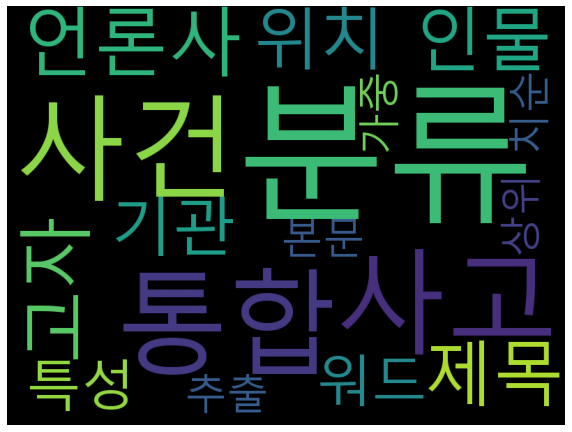

In [20]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='black',
                      width=800,
                      height=600)

print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()